In [147]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
import glob
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

In [148]:
data_path = "../data/"

In [16]:
def show_img(img):
    plt.figure(figsize=(10,10))
    plt.imshow(img)

In [3]:
images = glob.glob(data_path+'*.jpg')

In [4]:
curr_img = images[0]

In [5]:
img = cv2.imread(curr_img)

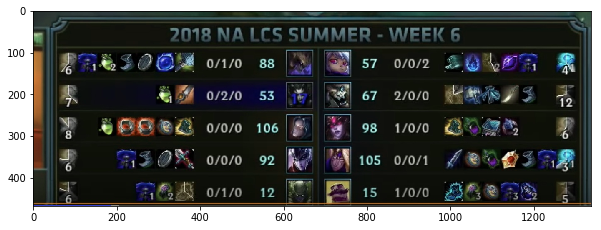

In [11]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img)

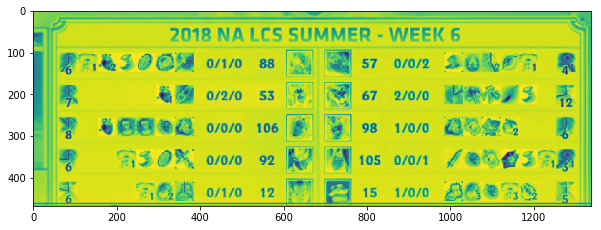

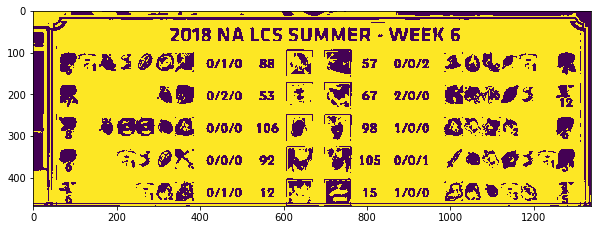

In [143]:
invert_img = cv2.bitwise_not(img)
gray_img = cv2.cvtColor(invert_img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray_img,(3,3),0)
show_img(blur)
_,thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY);
show_img(thresh)

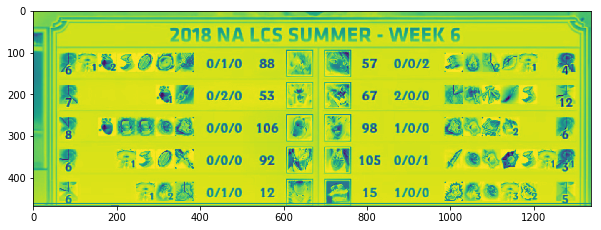

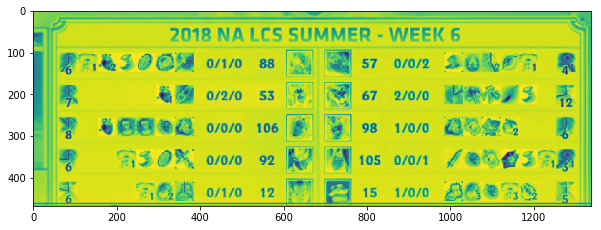

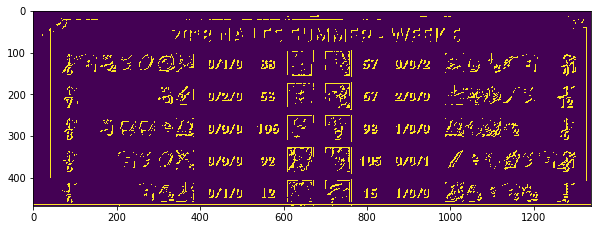

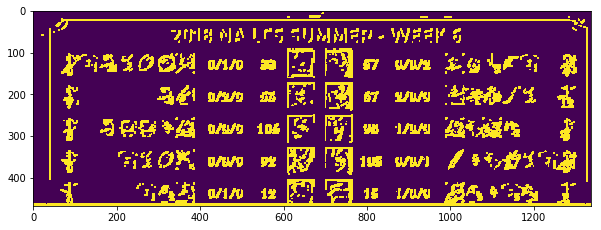

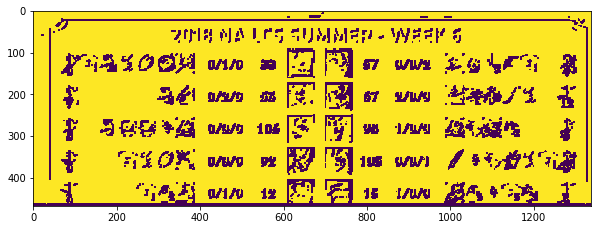

In [159]:
imgBlur = cv2.GaussianBlur(gray_img, (3, 3), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
imgTH = cv2.morphologyEx(imgBlur, cv2.MORPH_TOPHAT, kernel)
_, imgBin = cv2.threshold(imgTH, 0, 250, cv2.THRESH_OTSU)

imgdil = cv2.dilate(imgBin, kernel)
_, imgBin_Inv = cv2.threshold(imgdil, 0, 250, cv2.THRESH_BINARY_INV)

show_img(gray_img)
show_img(imgBlur)
show_img(imgBin)
show_img(imgdil)
show_img(imgBin_Inv)

In [144]:
img_new = Image.fromarray(blur)
text = pytesseract.image_to_string(img_new, lang='eng')
print (text)

2018 NA LCS SUMMER - WEEK 6
£77112} (96.3] MN 83 [E W 51 0/0/2 :30‘314f77'} ﬁ
% ha 0/2/0 53 [7 §[ 51 2mm «Qikti 132'
3 398.6 0/o/o 106 '7 m 93 1mm B‘BQ“; g
f 77:3 69"»; wow 92 W W 105 MM Ilﬁﬂé 7715
‘4' "ﬂag 0/1/0 12 [W ﬁ 15 now 502.35) T ‘


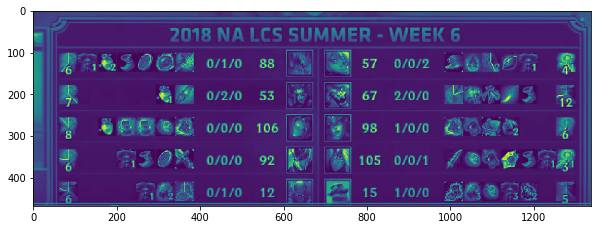

In [33]:

# convert image to grayscale# conve 
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# grayscale image represented as a 2-d array
plt.figure(figsize=(10,10))
plt.imshow(gray_img)

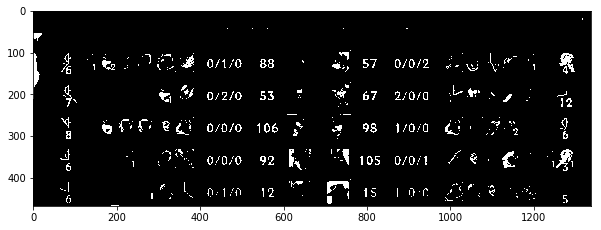

In [34]:
# threshold for grayscale image
_, threshold_img = cv2.threshold(gray_img, 130, 255, cv2.THRESH_BINARY)

threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(10,10))
plt.imshow(threshold_img)

In [9]:
img_new = Image.fromarray(threshold_img)
text = pytesseract.image_to_string(img_new, lang='eng')
print (text)

0/1/0

0/2/0

0/0/0

0/0/0

0/1/0

88

53

106

92

12

\I
m

 

1'.

i-
ii

1

y

a.” 57 0/0/22
-ﬂ

9! 67 2/0/0
L; 98 now
vi

2" 105 men
r‘. 15 1090


'0/1/0\n\n0/2/0\n\n0/0/0\n\n0/0/0\n\n0/1/0\n\n88\n\n53\n\n106\n\n92\n\n12\n\n\\I\nm\n\n \n\n1\'.\n\ni-\nii\n\n1\n\ny\n\na.” 57 0/0/22\n-ﬂ\n\n9! 67 2/0/0\nL; 98 now\nvi\n\n2" 105 men\nr‘. 15 1090'